In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



# Contour tracking

Given a bunch of contours, figure out if I already have them in a tracked array, if not, add them to the tracked array  


## 2 gropus of 4 circles (static)
If the distance is less than MAX_DISTANCE pixels, then the circles are in the same group. We draw a green line between them

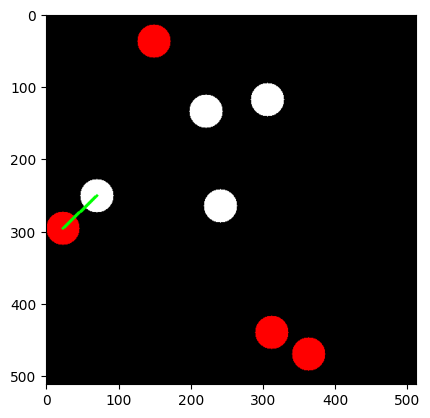

In [103]:
MAX_DISTANCE = 100
# white image
img = np.zeros((512,512,3), np.uint8)
# generate 4 random circles and store them in 
circles = []
for i in range(4):
    x = np.random.randint(0, 512)
    y = np.random.randint(0, 512)
    circles.append((x,y))
    cv.circle(img, (x,y), 23, (255,255,255), -1)


# generate 4 other random circles
new_circles = []
for i in range(4):
    x = np.random.randint(0, 512)
    y = np.random.randint(0, 512)
    new_circles.append((x,y))

for circle in new_circles:
    cv.circle(img, circle, 23, (255,0,0), -1)
    for c in circles:
        # if distance is less than 20, draw a line between the two circles
        if np.linalg.norm(np.array(circle) - np.array(c)) < MAX_DISTANCE:
            cv.line(img, circle, c, (0,255,0), 3)

plt.imshow(img)

## Pseudo animation. create a multi axis plot and add circles to that 

Let's create a group of 4 circles moving around with brownian motion

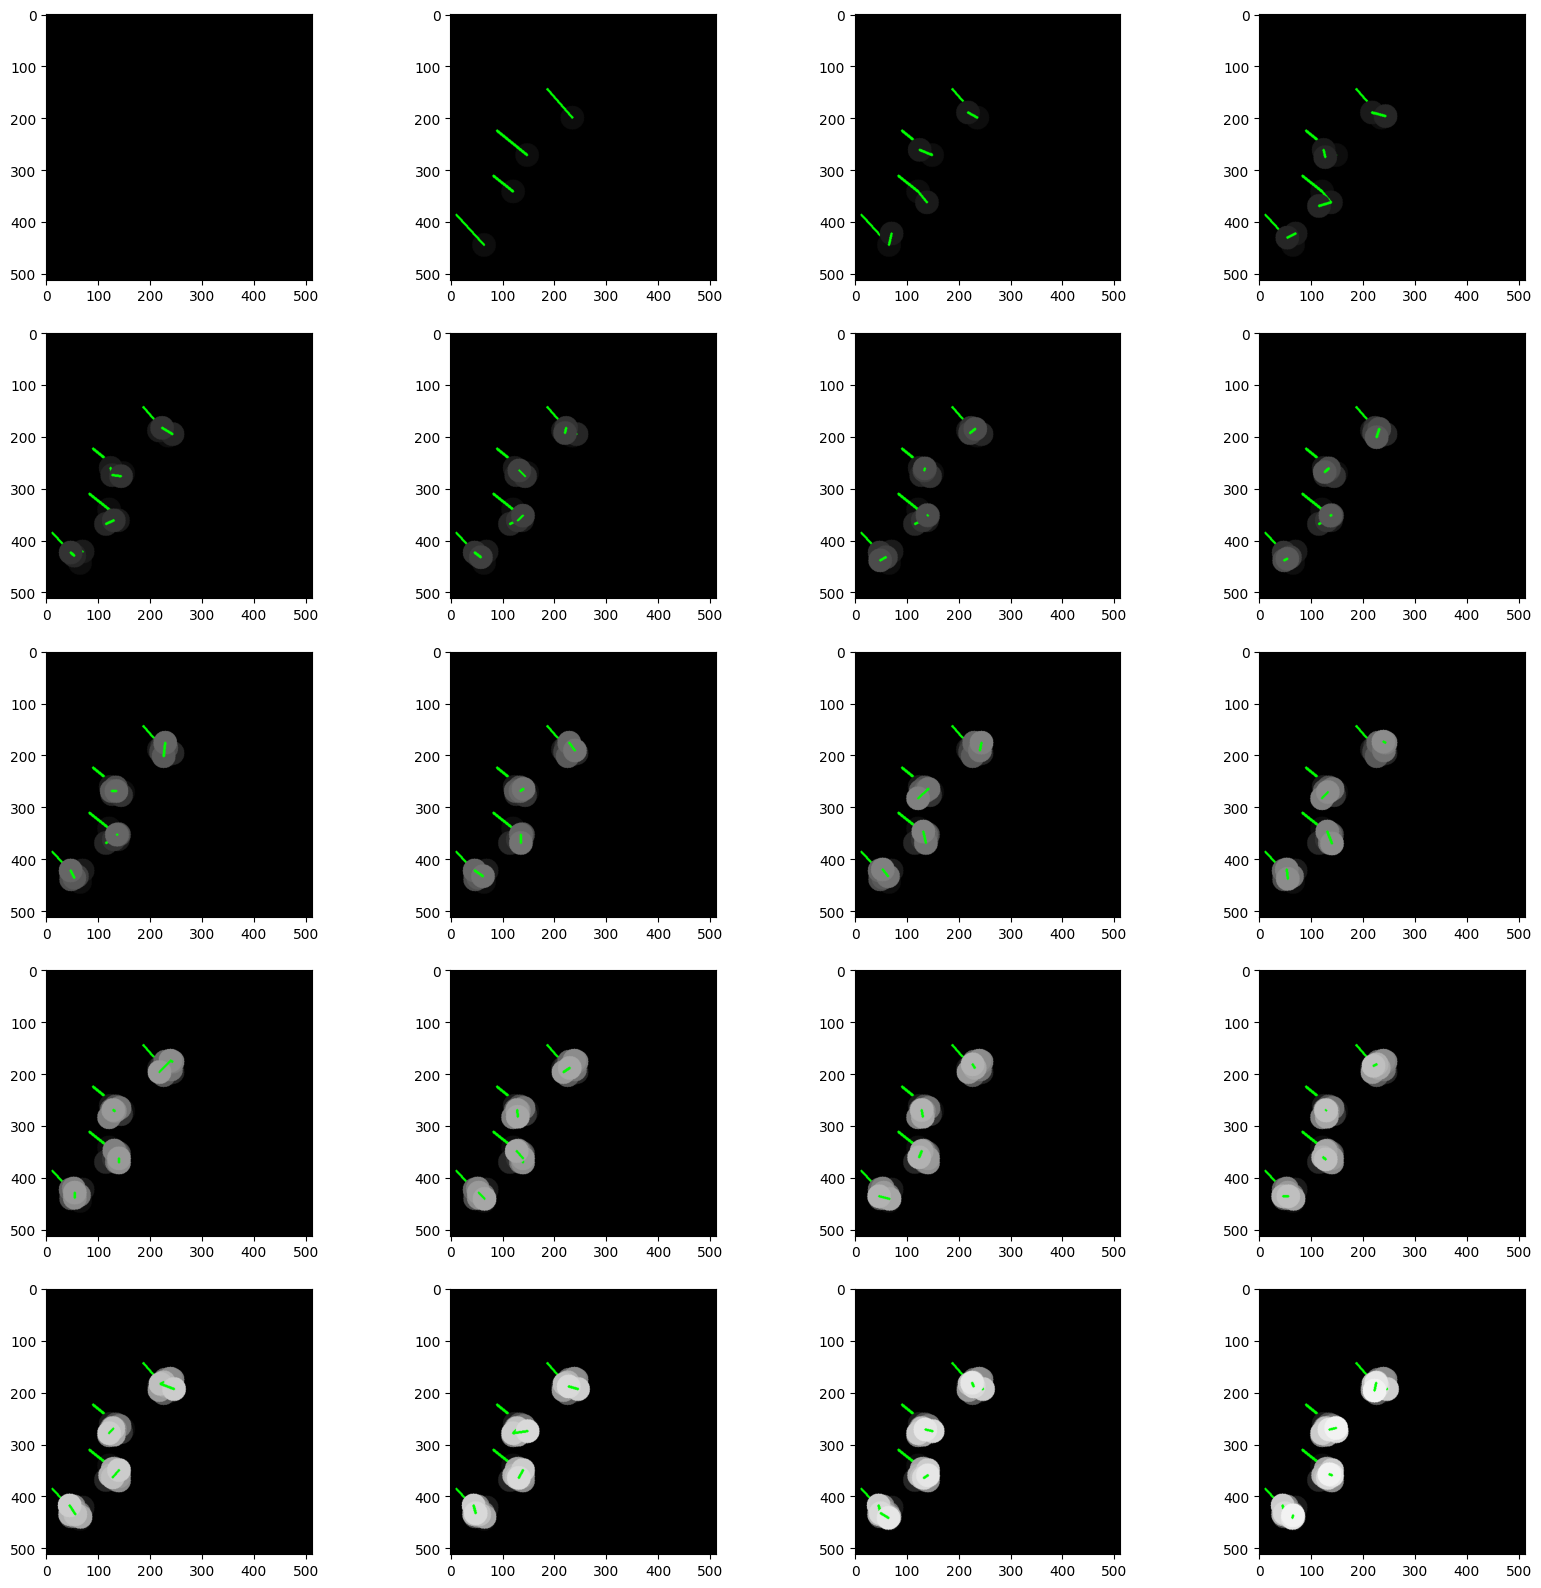

In [145]:
N_CIRCLES = 4
N_FRAMES = 20
MOTION_RANGE = 20


# initialize circle position
circles = [ (np.random.randint(0, 512), np.random.randint(0, 512)) for i in range(N_CIRCLES)]
# black image
img = np.zeros((512,512,3), np.uint8)

# create a figure with 5 rows and 4 columns
fig, ax = plt.subplots( nrows=5, ncols=4, figsize=(20,20))

# first frame of the animation is the initialized postion above
animation = [circles]
for i in range(1,N_FRAMES):
    f = []
    for c in circles:
        c = (c[0] + np.random.randint(30, 3*MOTION_RANGE), c[1] + np.random.randint(30,3*MOTION_RANGE))
        f.append(c)
    animation.append(f)


img = np.zeros((512,512,3), np.uint8)
for i in range(N_FRAMES):
    color_step = 255/N_FRAMES
    color_amount = color_step * i 
    for ci, c in enumerate(animation[i]):
        cv.circle(img, c, 23, (color_amount,color_amount,color_amount), -1)
        if i > 0:
            cv.line(img, c, animation[i-1][ci], (0,255,0), 3)
    ax[i//4, i%4].imshow(img)


        




RuntimeError: x must be a sequence

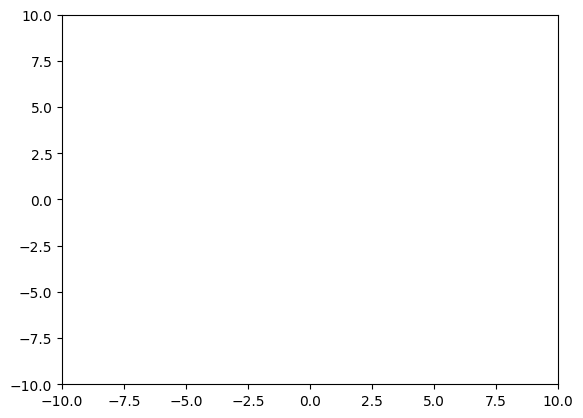